Linear regression by using Deep Neural network: Implement Boston housing price
prediction problem by linear regression using Deep Neural network. Use Boston House
price prediction dataset.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df=pd.read_csv('boston_housing.csv')

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.describe

<bound method NDFrame.describe of         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
MEDV       0
dtype: int64

In [7]:
X = df.drop(['MEDV'], axis=1)
y = df['MEDV']

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [10]:
model = Sequential([
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

In [11]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [12]:
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 606.6929 - mae: 22.5994 - val_loss: 494.8230 - val_mae: 20.4582
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 546.8098 - mae: 21.3323 - val_loss: 453.6061 - val_mae: 19.4669
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 500.3760 - mae: 20.1985 - val_loss: 404.8099 - val_mae: 18.2836
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 453.7287 - mae: 19.0170 - val_loss: 343.8793 - val_mae: 16.7430
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 359.9657 - mae: 16.8283 - val_loss: 268.9734 - val_mae: 14.6390
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 295.5629 - mae: 15.0338 - val_loss: 190.5989 - val_mae: 12.1451
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 209.4388 - mae: 12.3662 - val_loss: 122.3214 - val_mae: 9.5696
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 129.5587 - mae: 9.3052 - val_loss: 77.3490 - val_mae: 7.2305
Epoch 9/50
13/13 ━━━━━━━━━━

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,029 (35.27 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,020 (23.52 KB)

In [14]:
output = model.evaluate(X_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.3276 - mae: 2.3519


In [15]:
y_pred = model.predict(x=X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [16]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [17]:
print(mae)

2.4729940489226694


In [18]:
print("mse",mse)

mse 13.651529919635664


In [19]:
print("r2_score",r2)

r2_score 0.8138439157053909


In [20]:
print("\nPredicted Prices vs Actual Prices (First 5 samples):")
for i in range(5):
    print("Predicted:", y_pred[i], "| Actual:", y_test.iloc[i])


Predicted Prices vs Actual Prices (First 5 samples):
Predicted: [27.862158] | Actual: 23.6
Predicted: [33.64315] | Actual: 32.4
Predicted: [18.021992] | Actual: 13.6
Predicted: [27.519377] | Actual: 22.8
Predicted: [16.604845] | Actual: 16.1


In [21]:
import seaborn as sns


<Axes: xlabel='rm', ylabel='MEDV'>

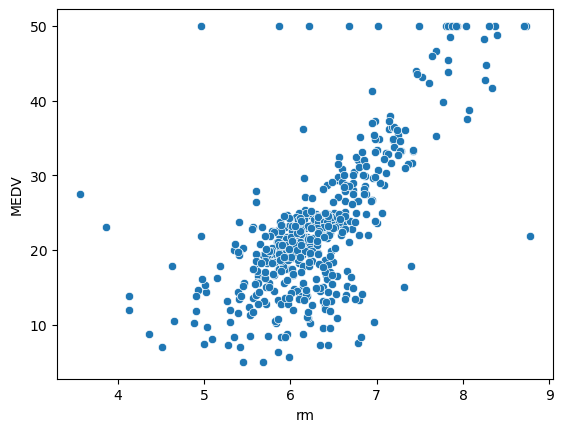

In [22]:
sns.scatterplot(data=df, x=df['rm'], y=df['MEDV'])
##room vs price

<Axes: xlabel='MEDV', ylabel='Count'>

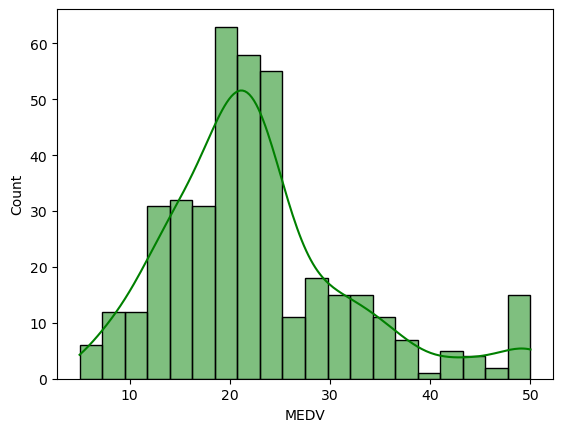

In [23]:

sns.histplot(y_train, bins=20, kde=True, color='green')


In [25]:
# --- Predict using predefined user input values ---
print("\n--- Predict Boston House Price from Predefined Input ---")

# Define default user input values for all 13 features
# (These values are taken from the first row of the dataset as an example)
user_input = [0.00632, 18.0, 2.31, 0, 0.538, 6.575, 65.2, 4.0900, 1, 296, 15.3, 396.90, 4.98]
input_features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age',
                  'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']

# Convert to DataFrame and scale
user_df = pd.DataFrame([user_input], columns=input_features)
user_scaled = scaler.transform(user_df)

# Predict using the model
predicted_price = model.predict(user_scaled)
print(f"Predicted House Price: ${predicted_price[0][0]:.2f}")



--- Predict Boston House Price from Predefined Input ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted House Price: $29.13
